Example notebook showing analytic likelihood functions

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest.likelihoods import *
from nnest.priors import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
def plot_likelihood(like, prior, plot_samples=True, plot_like=True, n=200):
    plt.figure(figsize=(10,8))
    if plot_like:
        xx = np.linspace(prior.minimum[0], prior.maximum[0], n)
        yy = np.linspace(prior.minimum[1], prior.maximum[1], n)
        likes = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                likes[i,j] = np.exp(like([xx[i], yy[j]]))
        plt.contourf(xx, yy, likes.T, levels=100)
    if plot_samples:
        samples = like.sample(prior, 1000)
        plt.scatter(samples[:,0], samples[:,1], c='r', s=5, alpha=0.5)
    plt.show()

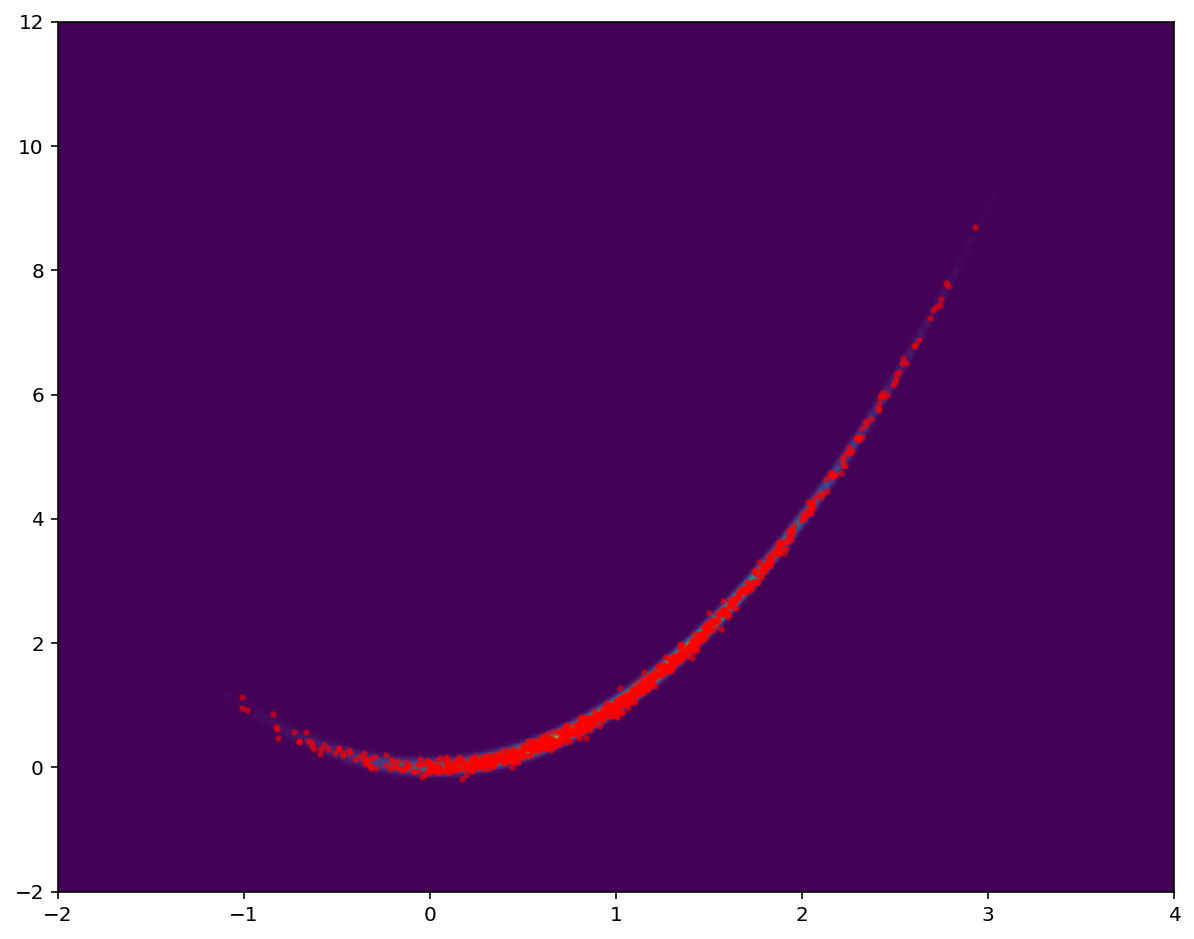

In [6]:
prior = UniformPrior(2, [-2, -2], [4, 12])
like = Rosenbrock(2)
plot_likelihood(like, prior)

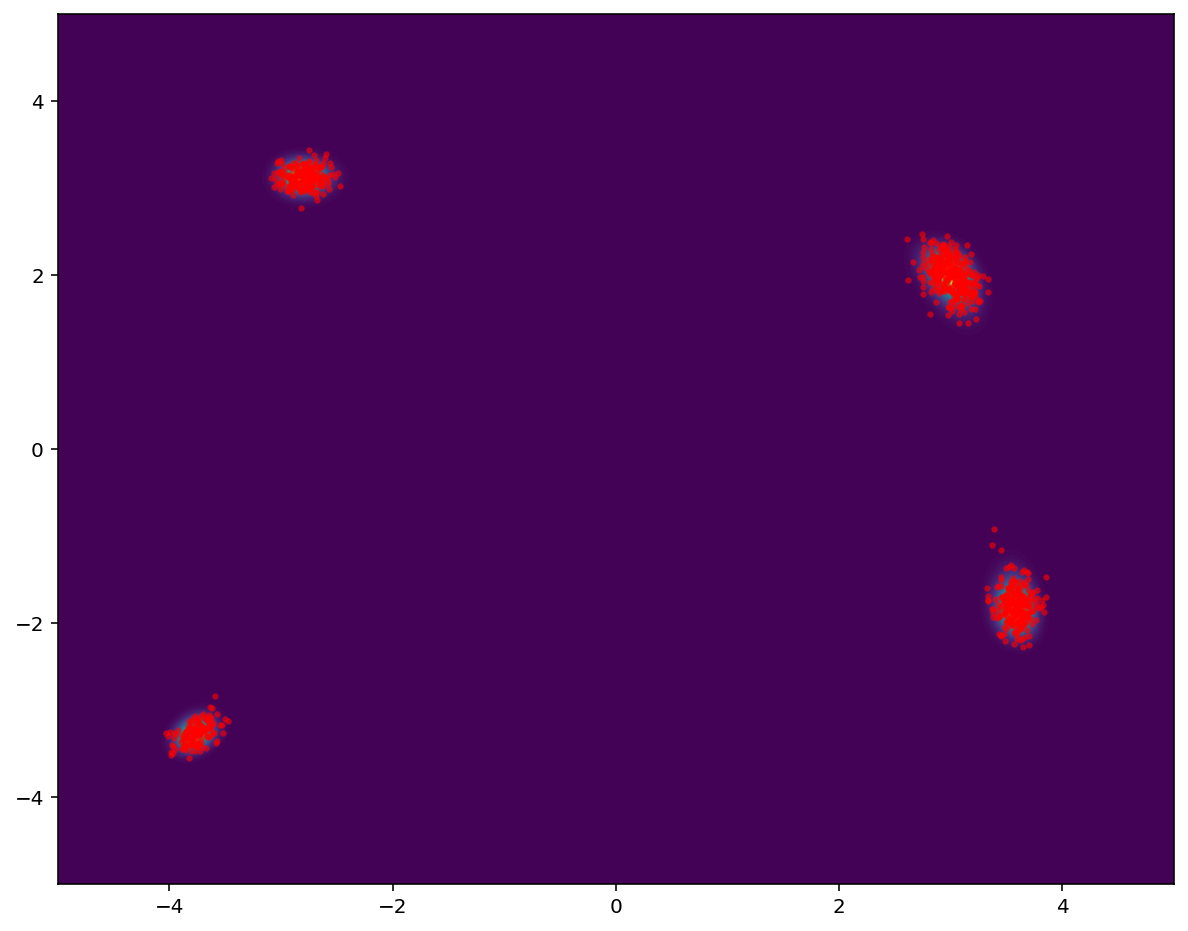

In [7]:
prior = UniformPrior(2, -5, 5)
like = Himmelblau(2)
plot_likelihood(like, prior)

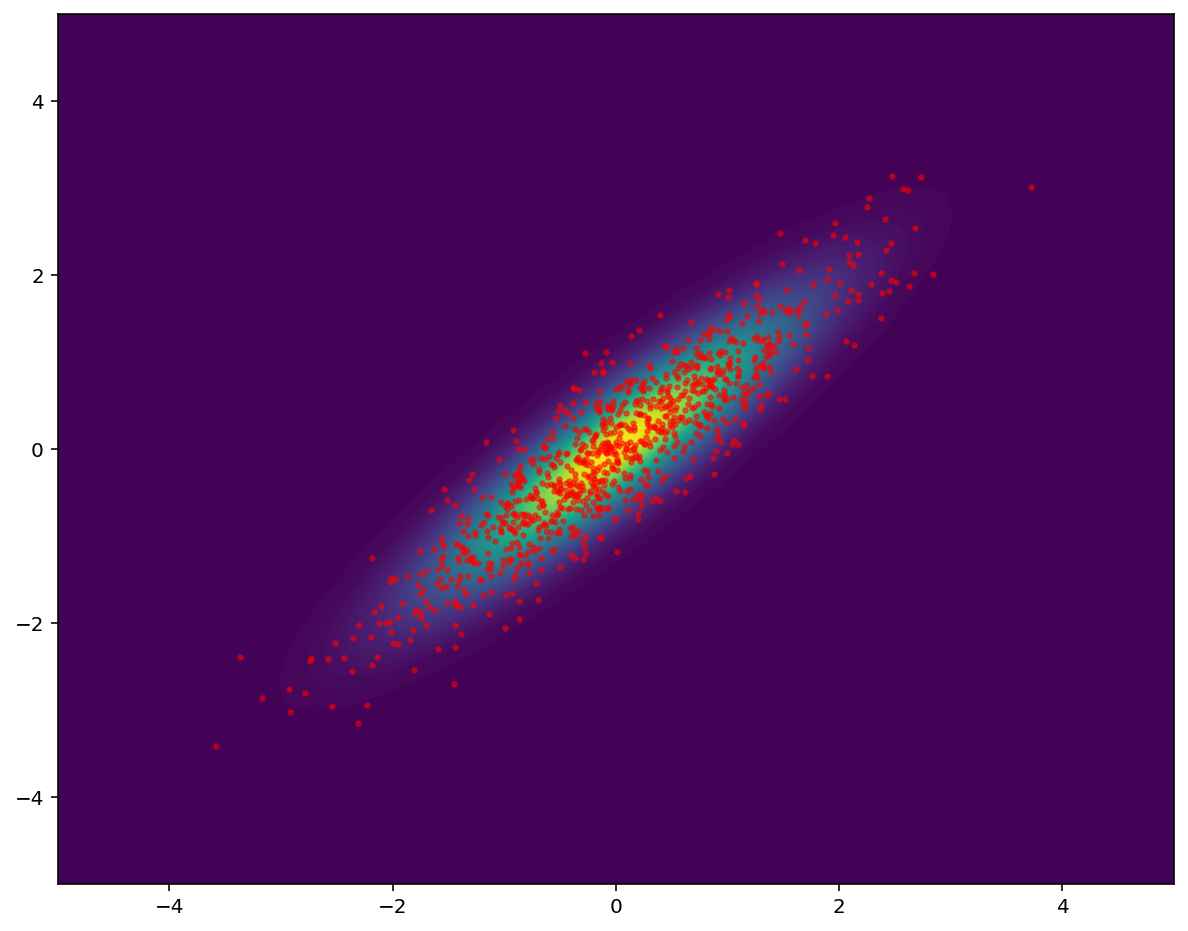

In [8]:
prior = UniformPrior(2, -5, 5)
like = Gaussian(2, 0.9)
plot_likelihood(like, prior)

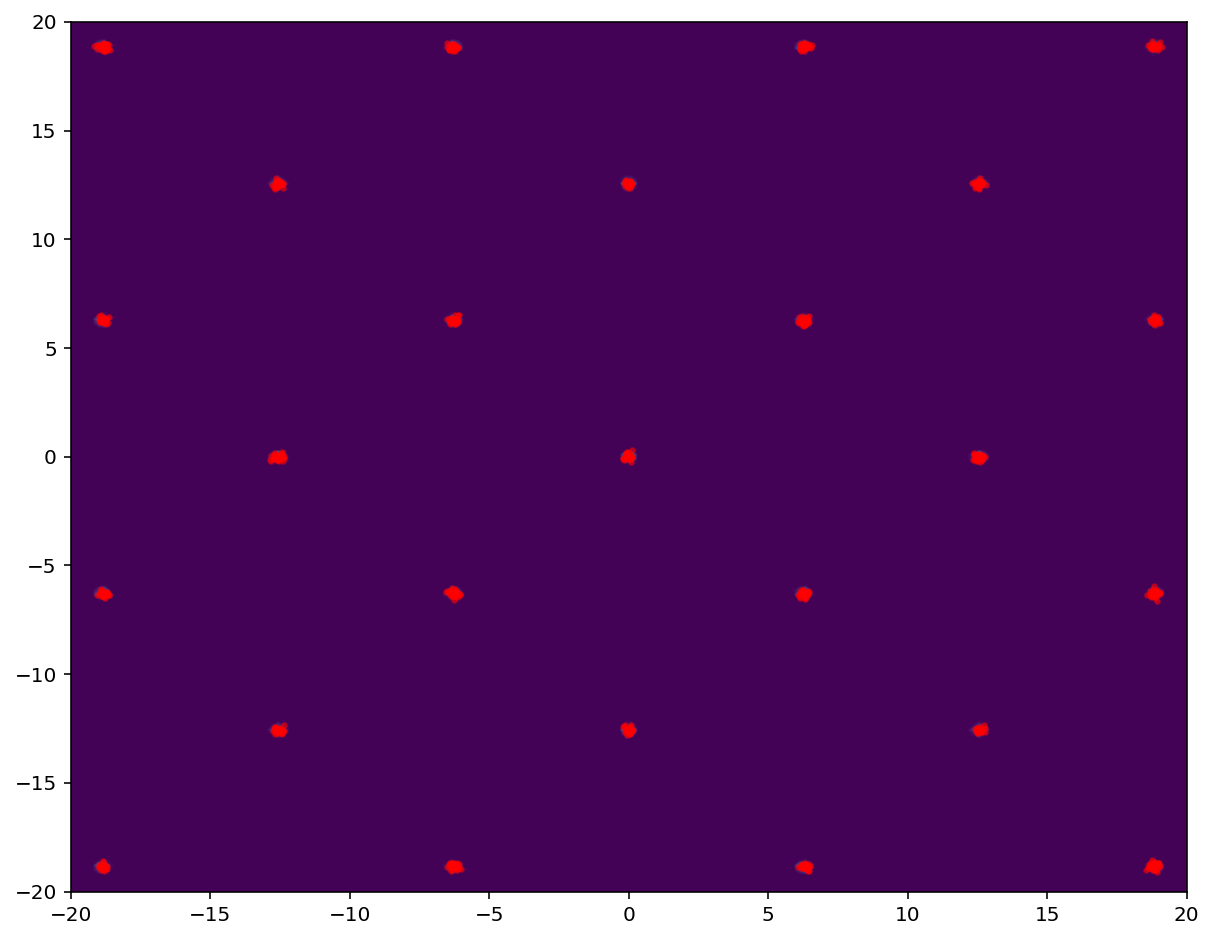

In [9]:
prior = UniformPrior(2, -20, 20)
like = Eggbox(2)
plot_likelihood(like, prior)

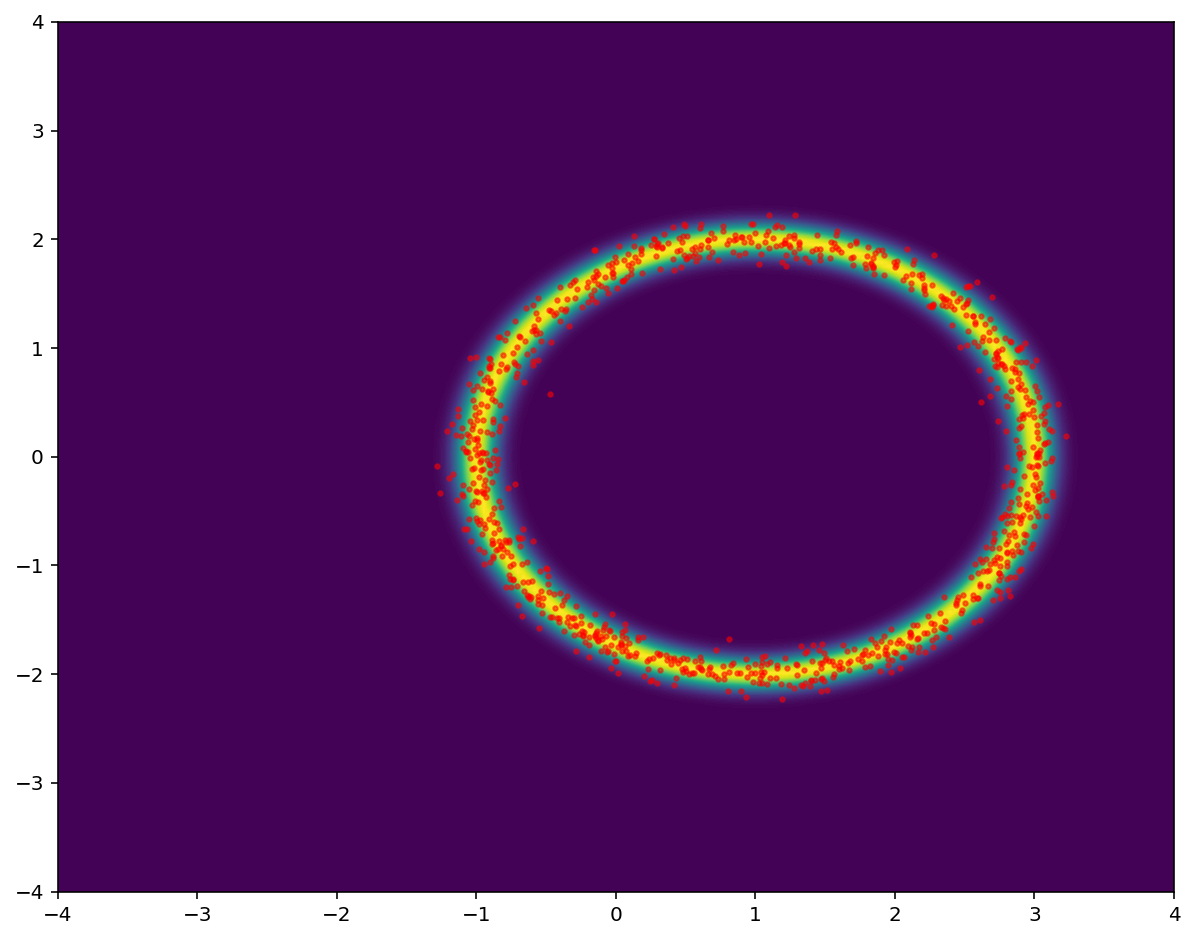

In [10]:
prior = UniformPrior(2, -4, 4)
like = GaussianShell(2, center=[1.0, 0.0])
plot_likelihood(like, prior)

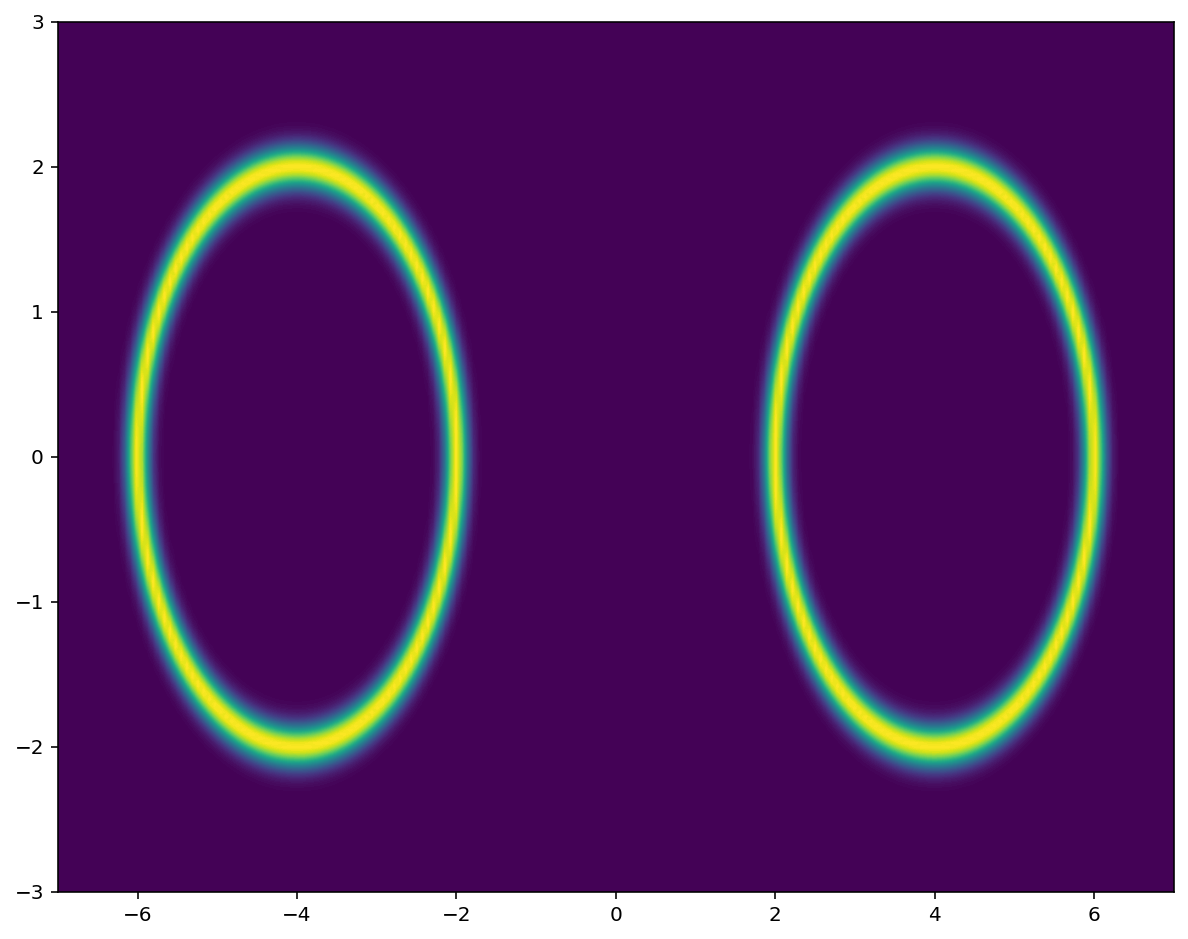

In [11]:
prior = UniformPrior(2, [-7, -3], [7, 3])
like = DoubleGaussianShell(2, centers=[[-4.0, -0.0], [4.0, 0.0]])
plot_likelihood(like, prior, plot_samples=False)

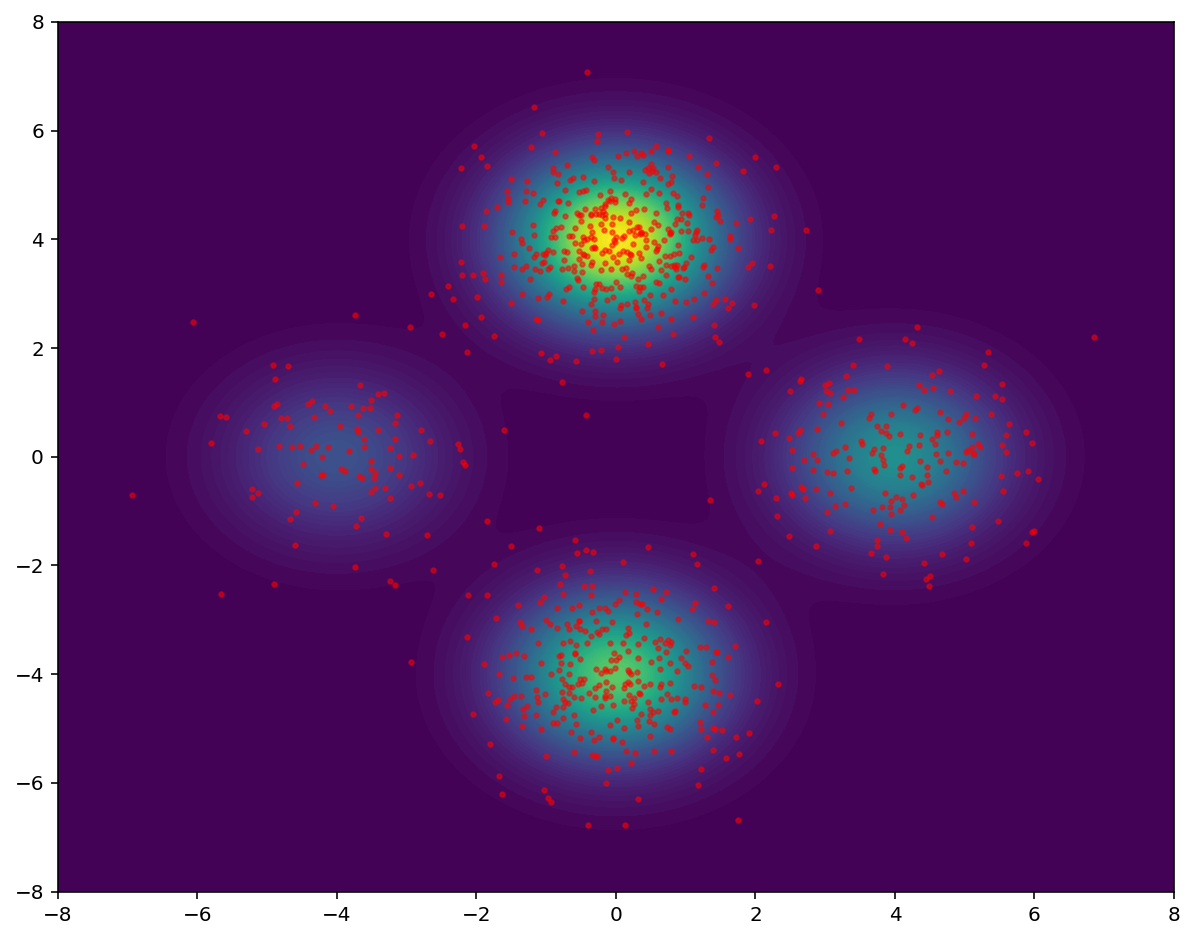

In [12]:
prior = UniformPrior(2, -8, 8)
like = GaussianMix(2)
plot_likelihood(like, prior)